# Big Data y Machine Learning (UBA) 2025
## Clase 8 - Histogramas y Visualización de datos

**Objetivo:**
Que se familiaricen con métodos no paramétricos para estimacion de la distribución de densidad de una variable aleatoria.

### Métodos no paramétricos
El objetivo es predecir distribución de una variable de interés 
- 𝑌 variable aleatoria de interés
- 𝑓(𝑌) distribución de densidad 𝑌

Métodos
- Repaso a Numpy vs. Pandas
- Histogramas con Matplotlib
- Histogramas mejorados con Seaborn y sus opciones


#### Repaso: NumPy y scikit-learn
**El paquete NumPy** es fundamental en Python. Está escrito en lenguajes de bajo nivel, lo que permite realizar operaciones matemáticas de manera muy eficiente. Para más información, ver la [guía oficial de uso de NumPy](https://docs.scipy.org/doc/numpy/user/index.html).

**El paquete scikit-learn** es una biblioteca de Python usada para machine learning, construida encima de NumPy y otros paquetes. Permite procesar datos, reducir la dimensionalidad de la base, implementar regresiones, clasificaciones, clustering y más. Pueden ver la [web de scikit-learn](https://scikit-learn.org/stable/)


In [1]:
#Installamos el paquete necesario
!pip install scikit-learn

# Alternativa
#import sys
#!{sys.executable} -m pip install scikit-learn

In [5]:
# Importamos paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Repaso breve de Numpy

A continuación crearemos dos vectores con los que trabajaremos en nuestra primera regresión lineal.

In [7]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)
# Ambos son vectores fila

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [9]:
# Reshape para transformar x en un vector columna
x = x.reshape((-1, 1))   # El -1 indica el largo del array
# Es equivalente a: x = x.reshape((6, 1))

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [13]:
# Generamos datos aleatorios con distribucion normal
np.random.seed(20)
X = np.concatenate([np.random.normal(0,1,500), np.random.normal(5,1,500)]).reshape(-1,1)



##### Estastistica descriptiva en Numpy vs. Pandas

In [19]:
# Estadistica descriptiva en Numpy
print("Media", np.mean(X).round(2))
print("Desvío Estándar (s.d.)", np.std(X).round(2))
print("Mínimo", np.min(X).round(2))
print("Mediana", np.percentile(X,50).round(2))
print("Máximo", np.max(X).round(2))

Media 2.5
Desvío Estándar (s.d.) 2.67
Mínimo -3.19
Mediana 2.21
Máximo 7.89


In [21]:
# convertimos la matriz en un base de datos ("DataFrame")
df_X = pd.DataFrame(X,columns=['Var_Normal'])

# Visualizamos
print(df_X.head(3))

# Obtenemos estadistica descriptiva de las variables
df_X.describe().round(2)

   Var_Normal
0    0.883893
1    0.195865
2    0.357537


,Var_Normal
count,1000.00
mean,2.50
std,2.67
min,-3.19
25%,0.01
50%,2.21
75%,4.98
max,7.89


## Histogramas con Matplotlib
Como introducimos en clases anteriores, el módulo de Matplotlib nos ayuda a hacer gráficos y visualización de datos

Nuestro objetivo es estimar la distribucion de densidad $f(Y)$ una variable aleatoria Y, con la siguiente aproximación no parametrica:

$$
\hat{f}(y) = \frac{M}{n} ∑^𝑛_i I(𝑌_𝑖 \in B_l)  
$$
Con $B_l$ barra (bin) $l$-ésimo

Podemos usar el atributo `hist` de Matplotlib. Ver documentación [acá](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

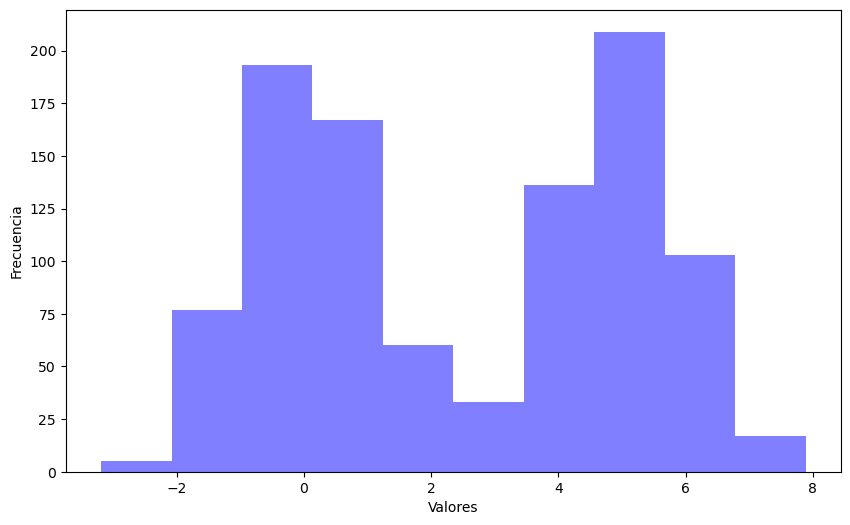

In [23]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, alpha=0.5, color='blue') # por default, 10 bins
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

A mayor número de barras (bins en ingles), menos observaciones se acumulan en cada bin (notar diferencia de escala en el eje y), como muestra el siguiente gráfico

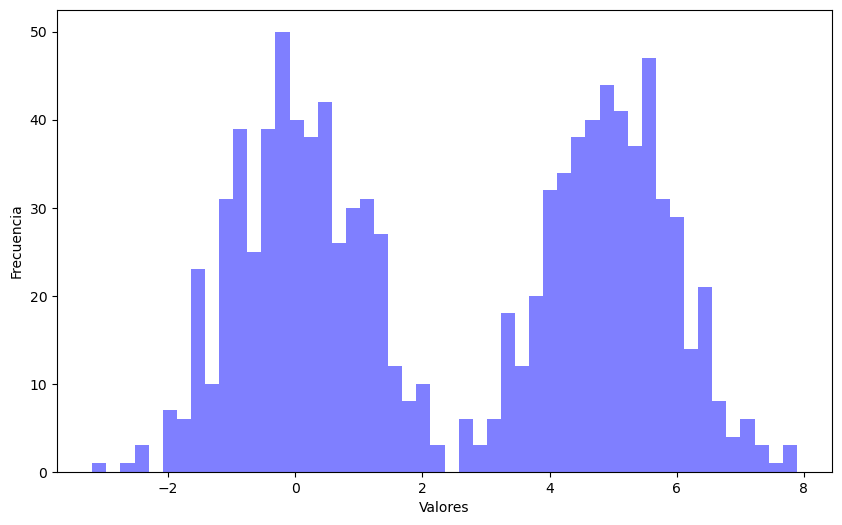

In [31]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=50, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

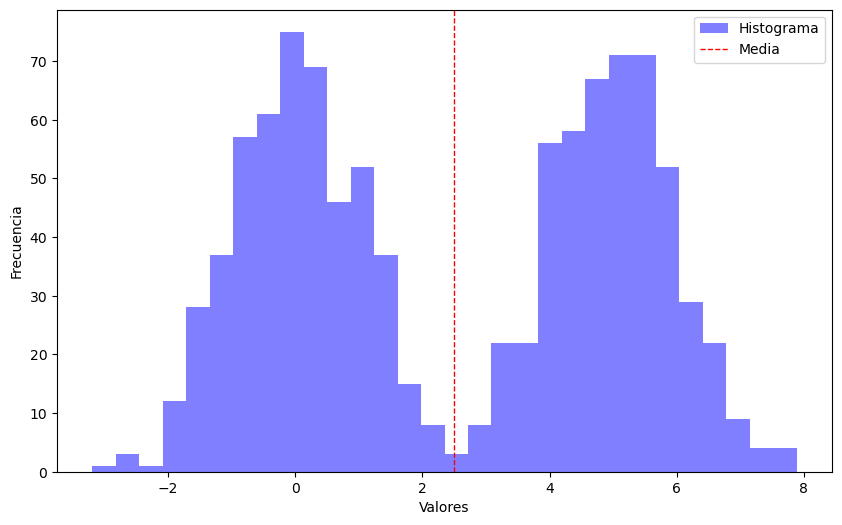

In [33]:
# Grafico
plt.figure(figsize=(10,6))
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Agregamos línea vertical con la media
mean_value = np.mean(X)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()  # Show legend with label for the mean line
plt.show()

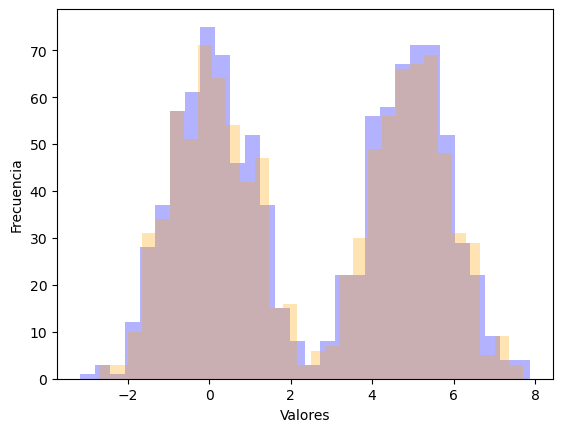

In [35]:
# Definimos un criterio para "cortar" outliers (por ejemplo, a 2 DE de la media)
mean_value = np.mean(X)
std_dev = np.std(X)
lower_bound = mean_value - 2 * std_dev
upper_bound = mean_value + 2 * std_dev

# Filtramos los datos
X_filtered = X[(X >= lower_bound) & (X <= upper_bound)]

# Plot histogram of filtered data
plt.hist(X, bins=30, alpha=0.3, color='blue', label='Histograma')
plt.hist(X_filtered, bins=30, alpha=0.3, color='orange', label='Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

También podemos usar algunas funciones de seaborn para graficar histogramas. Ver documentación [acá](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)


## Histogramas con Seaborn
En este ejemplop utilizaremos una base de datos del modulo de `seaborn`, también muy utilizada en procesamiento y visualización de datos en Python. Para más información ver [seaborn](https://seaborn.pydata.org/)

In [ ]:
# Primero, installamos el paquete
#!pip install seaborn

In [37]:
import seaborn as sns

In [39]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##### Pregunta: Como verían la estadistica descriptiva de esta base de datos de propinas?

In [2]:
# resolver aquí

NameError: name 'tips' is not defined

#### Visualización de dos variables con Seaborn

Podemos hacer un lindo gráfico de dispersión entre dos variables rápidamente. Por ejemplo entre la cuenta total (`total_bill`) y las propinas (`tips`).

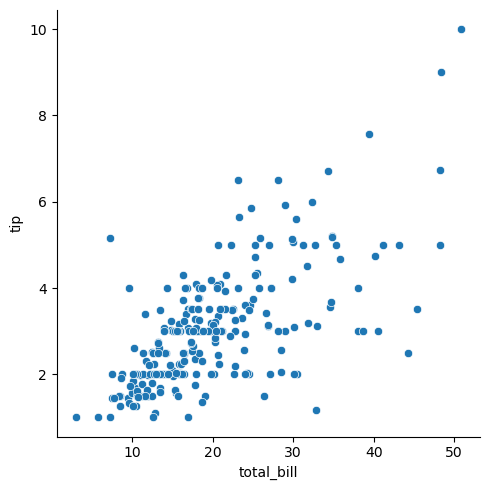

In [41]:
# Gráfico de dispersión
sns.relplot(data=tips, x="total_bill", y="tip")

Ahora sí, utilicemos seaborn para hacer un histogramas

<Axes: xlabel='tip', ylabel='Density'>

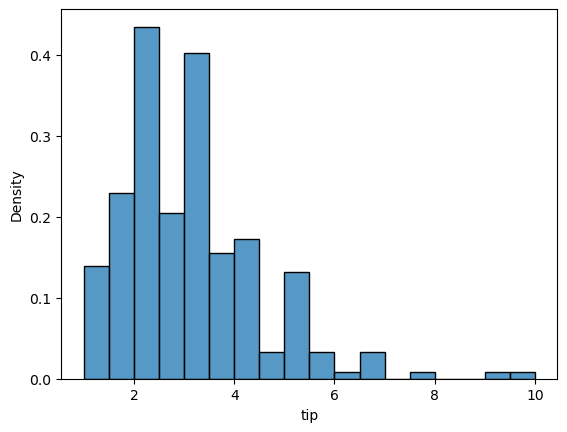

In [43]:
sns.histplot(data=tips['tip'], stat='density') # funcion de histograma de Seaborn

Podemos alterar los ejes y opciones usando las opciones de **Matplotlib**

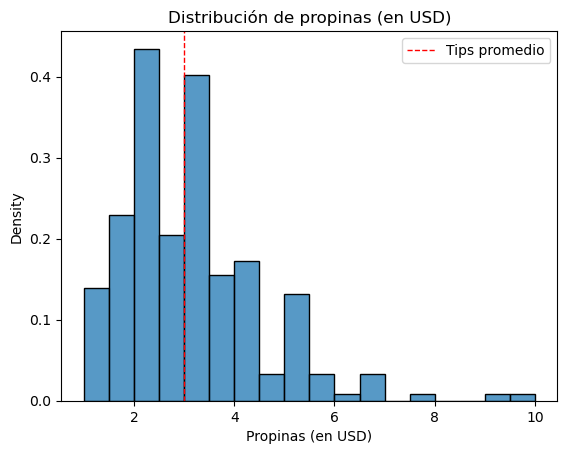

In [45]:
sns.histplot(data=tips['tip'], stat='density') # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

#### Histograma para dos categorías
Podemos hacer el histograma por grupos como varon y mujer, utilizando la opcion `hue`.

Text(0.5, 0, 'Propinas (en USD)')

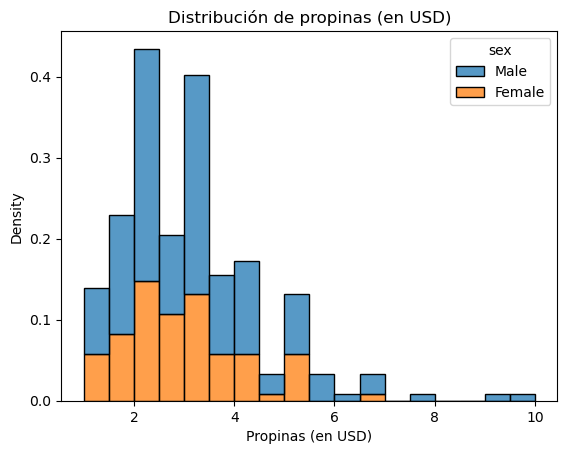

In [47]:
sns.histplot(data=tips, x="tip", stat='density', hue="sex", multiple="stack") 
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")

Tambien podemos hacerlo como dos paneles separados con la funcion `displot()` 

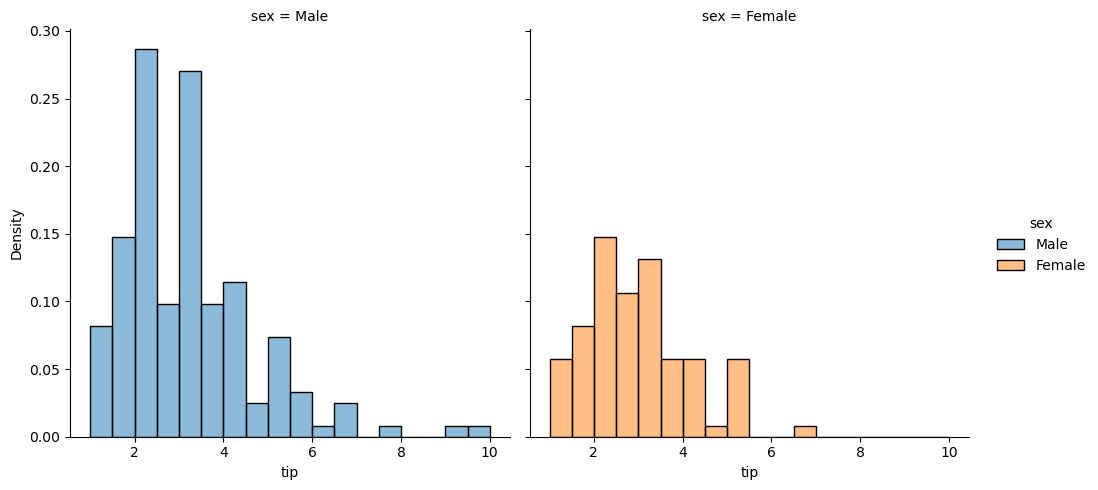

In [53]:
sns.displot(data=tips, x="tip", stat='density', hue="sex", col="sex") 

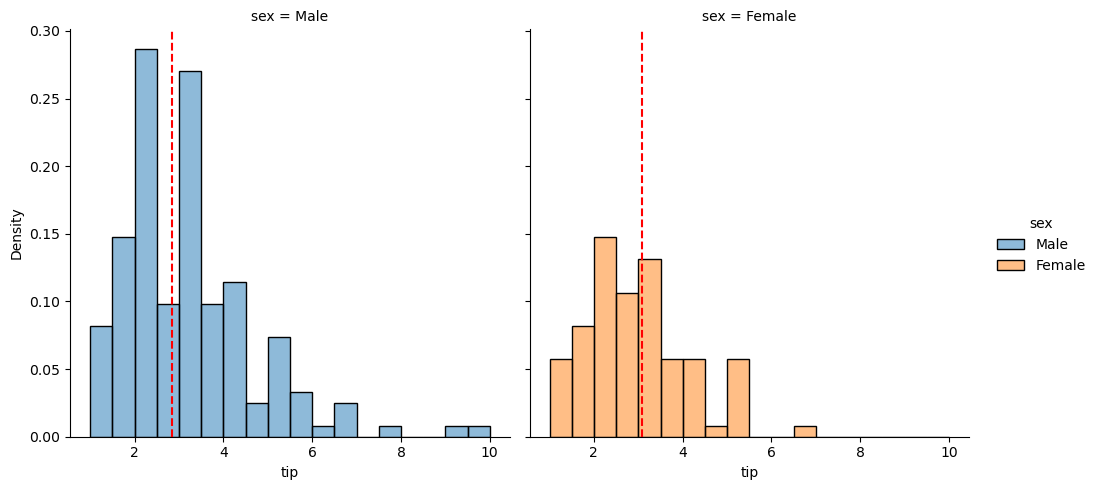

In [55]:
# Ahora le agregamos la media a cada distribucion
g = sns.displot(data=tips, x="tip", stat='density', hue="sex", col="sex") 

for ax, sex in zip(g.axes[0], tips['sex'].unique()):
    media = tips[tips['sex'] == sex]['tip'].mean()
    ax.axvline(media, color='r', linestyle='--', label=f'Media {sex}')
    ax.legend
plt.show()

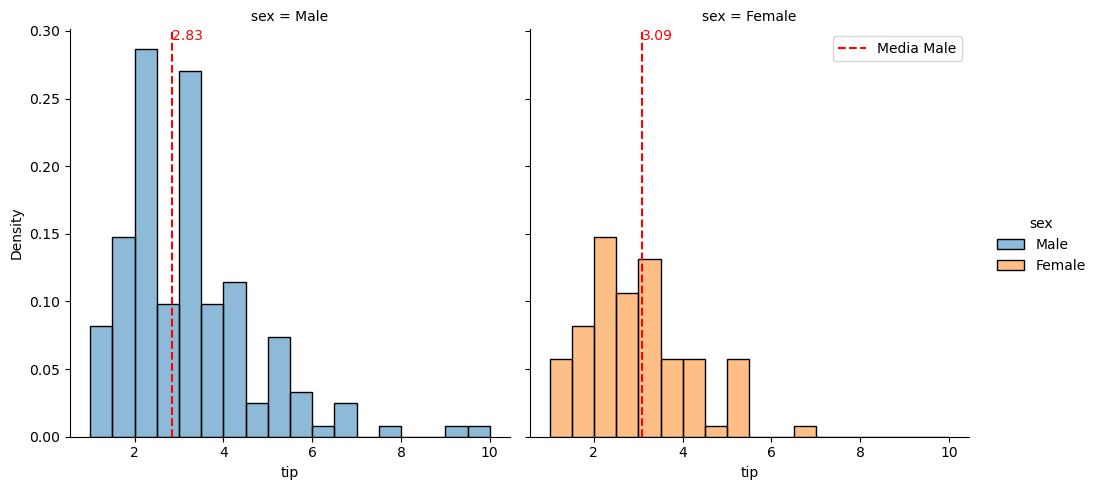

In [57]:
# Ahora le agregamos la media y el valor a cada distribucion
g = sns.displot(data=tips, x="tip", stat='density', hue="sex", col="sex") 

for ax, sex in zip(g.axes[0], tips['sex'].unique()):
    media = tips[tips['sex'] == sex]['tip'].mean()
    ax.axvline(media, color='r', linestyle='--', label=f'Media {sex}')
    ax.text(media, ax.get_ylim()[1], f'{media:.2f}', ha='left', va='top', color='r')

g.axes[0][-1].legend() #muestra la leyenda en el último panel

plt.show()

### Opciones de distribución de la variable
En lugar es estimas la densidad $\hat{f}(y)$, podemos mostrar la cantidad de observaciones en cada barrita (en cada bin) como:
- `density`: La función de densidad esta *normalizada* para que el área total del histograma de 1 (esta es la que hicimos)
- `count`: cuenta el número de observaciones en cada barrita (bin)
- `frequency`: muestra el número de observaciones dividido el ancho de cada barrita (bin)
- `probability or proportion`: normalizada de modo tal que la suma de las alturas de 1.
- `percent`: normalizada de modo tal que la suma de las alturas de 100%


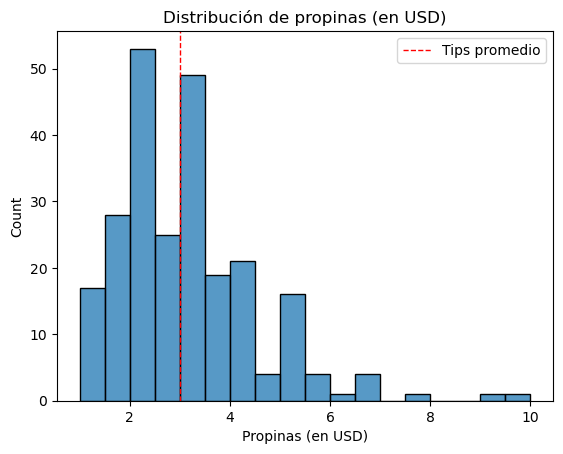

In [60]:
sns.histplot(data=tips['tip'], stat='count') # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

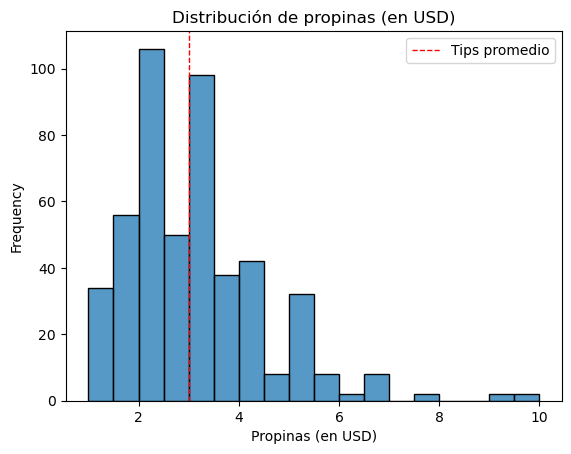

In [62]:
sns.histplot(data=tips['tip'], stat='frequency') # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

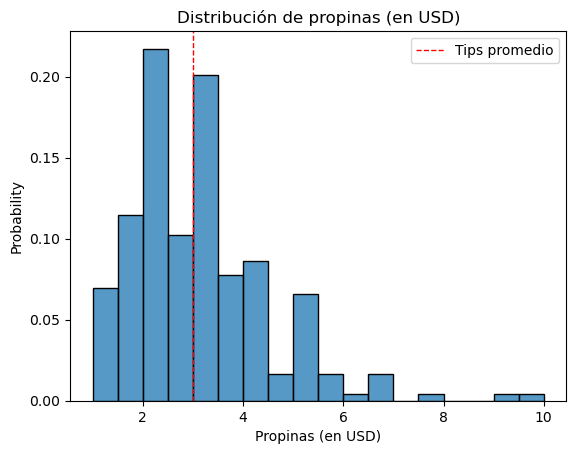

In [64]:
sns.histplot(data=tips['tip'], stat='probability') # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

### Barritas (bins)
Ahora juguemos con las opciones del número de barritas (`bins`)

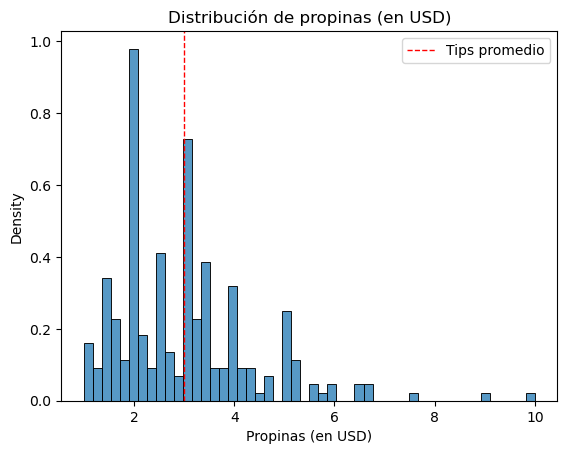

In [70]:
sns.histplot(data=tips['tip'], stat='density',bins=50) # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

### Ancho de banda (binwidth)
Ahora juguemos con las opciones del ancho de banda (`binwidth`)

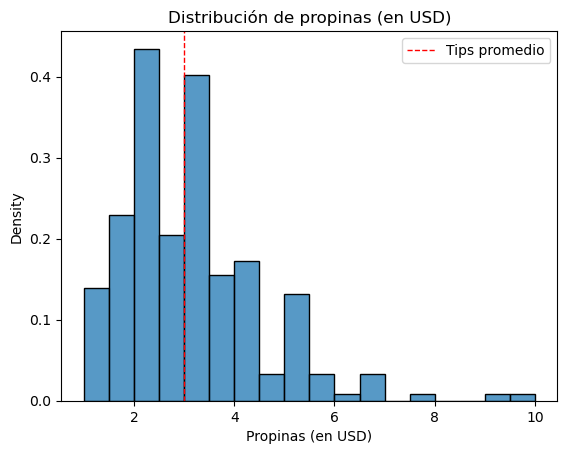

In [74]:
sns.histplot(data=tips['tip'], stat='density',binwidth=0.5) # funcion de histograma de Seaborn
mean_tips = np.mean(tips['tip'])
plt.axvline(mean_tips, color='red', linestyle='dashed', linewidth=1, label='Tips promedio')
plt.title("Distribución de propinas (en USD)")
plt.xlabel("Propinas (en USD)")
plt.legend()  # Nos muestra la leyenda para la media de tips

### Clase que viene: Kernels
Podemos sumar la estimación de la densidad usando un Kernel (Gaussiano) del cual veremos mas la clase que viene. 

<Axes: xlabel='tip', ylabel='Density'>

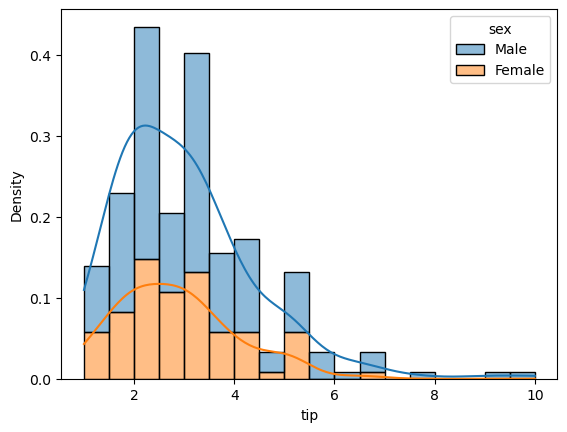

In [76]:
sns.histplot(data=tips, x="tip", hue="sex", stat="density", multiple="stack",  kde=True)